In [115]:
import numpy as np

In [116]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [117]:
data = np.load('./datasets/mnist_train_small.npy')

In [118]:
data.shape

(19999, 785)

In [119]:
X= data[:, 1:]
y = data[:, 0]

In [120]:
X.shape , y.shape

((19999, 784), (19999,))

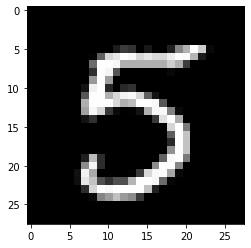

In [121]:
plt.imshow(X[0].reshape(28,28), cmap='gray')

In [122]:
y[0]

5

In [123]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [124]:
# X_train.shape , y_train.shape
# X_test.shape, y_test.shape

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
model = KNeighborsClassifier()

In [127]:
#training the model happens in fit fucntion
#plotting the points on the graph
#no work is happening in the training the KNN model

In [128]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [129]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [130]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

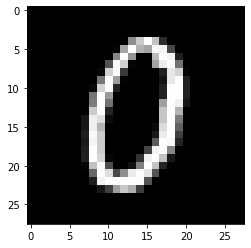

In [131]:
plt.imshow(X_test[2].reshape(28,28),cmap="gray")

In [132]:
model.score(X_test[:100], y_test[:100])

0.95

# Custom KNN

In [169]:
class CustomKNN:
    
    #constructor
    def __init__(self,n_neighbours=5):
        self.n_neighbours = n_neighbours
    
    
    #training fucntion
    def fit(self,X,y):
        
        self._X=X.astype(np.int64)
        self._y =y
    
    #predict a point
    #given a single point tell me which class it belongs to
    
    def predict_point(self,point):
        #storing the distance of  point from each point in training data
        list_dist =[]
        
        #these points are from my training data
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point-x_point)**2).sum()
            list_dist.append([dist_point,y_point])
            
        #sorting the list 
        sorted_dist = sorted(list_dist)
        
        #top k distances
        
        top_k = sorted_dist[:self.n_neighbours]
            
        #taking the counts
        items,counts = np.unique(np.array(top_k)[:,1],return_counts=True)
        
        ans =items[np.argmax(counts)]
    
        return ans
    
    #predict funtion
    #give me answer for each number in the array
    
    def predict(self,X):
        result =[]
        
        for point in X:
            result.append(self.predict_point(point))
        return np.array(result,dtype=int)
        
    #score to measure my accuracy
    
    def score(self,X,y):
        return sum(self.predict(X)==y)/len(y)

In [170]:
m2 = CustomKNN()
m2.fit(X_train,y_train)

In [ ]:
m2.predict(X_test[:100])

In [ ]:
y_test[:100]